## Proyecto 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Se define la función de error
def error(xdat,xpred):
    xdat=np.array(xdat)
    xpred=np.array(xpred)
    err=(xdat-xpred)**2
    return err.sum()
#Se define la nueva ecuación logística ajustada a t0
def Logistic2(t,x0,a,b):
    return b*x0/(x0+(b-x0)*np.exp(-a*(t-1983)))

In [3]:
#Se adquiere los datos del archivo, el cual tiene 2 columnas
df=pd.read_csv("PoblacionVIH_Mexico.dat", delimiter="\t",header=None)#La primera columna es la que tiene los datos del tiempo
time=df[0]
#La segunda columna es la que tiene los datos de población
data=df[1]

In [4]:
#Calcularemos la suma de casos acumulados
cumdata=np.zeros(data.size)
#Establecemos un valor de suma
sum=0
for i in range(data.size):
    #Se le aumenta el dato de cada iteración
    sum+=data[i]
    #Este valor se guarda en el array cumdata
    cumdata[i]=sum

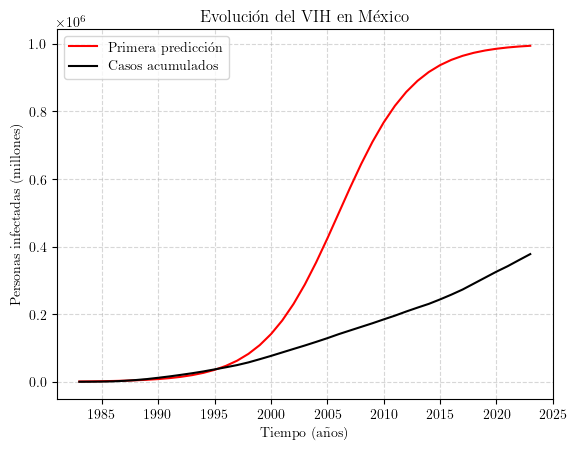

In [5]:
#Establecemos los parámetros iniciales
x0i=10**3
ai=0.3
bi=10**6
#Para mostrar la figura en formate latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig,ax=plt.subplots()
#Datos de primera predicción
guess1=Logistic2(time,x0i,ai,bi)
#Movemos el tiempo para que t=1940 se muestre como la posición inicial
plt.plot(time,guess1,color="red",label="Primera predicción")
plt.plot(time,cumdata,color="black",label="Casos acumulados")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Personas infectadas (millones)")
plt.title("Evolución del VIH en México")
plt.legend()
plt.savefig("P2I1.pdf")

In [24]:
n=10**6 #Número de iteraciones
sx=1 #Std del error de x
sa=0.001 #Std del error de a
sb=100 #Std del error de b
error_array=np.zeros(n) #Error cuadrático por cada iteración
success=0 #Contador de número de éxitos
#Valores que cambiarán para ajustar mejor los datos
#Los inicializamos con los valores iniciales
x0=x0i
a=ai
b=bi
xinitial=guess1
#Iteraremos n veces
for i in range(n):
    #Variable a la que mutaremos aleatoriamente
    #Si es 0 cambia x0, 1 cambia a y 2 cambia b
    choice=np.random.choice(3)
    #Se calcula el error inicial
    err0=error(xinitial,cumdata)
    error_array[i]=err0
    #Mutamos la variable escogida
    if choice==0:
        delta_x = np.random.normal(0,sx)   #Valor de la mutación     
        new_x=Logistic2(time,x0+delta_x,a,b) #Nuevos valores
        err1=error(new_x,cumdata)              #Nuevo error
        if err0>err1: #Si el nuevo error es menor, se mantiene la mutación
            xinitial=new_x  
            x0+=delta_x
            err0=err1
            success+=1  #Aumenta el número de éxitos
    if choice==1:
        delta_a = np.random.normal(0,sa)
        new_x=Logistic2(time,x0,a+delta_a,b)
        err1=error(new_x,cumdata)
        if err0>err1:
            xinitial=new_x
            a+=delta_a
            err0=err1
            success+=1
    if choice==2:
        delta_b = np.random.normal(0,sb)
        new_x=Logistic2(time,x0,a,b+delta_b)
        err1=error(new_x,cumdata)
        if err0>err1:
            xinitial=new_x
            b+=delta_b
            err0=err1
            success+=1

In [69]:
#Numero de éxitos y valor final de error
success,error_array[-1]

(67933, 0.0)

In [70]:
#Parámetros que mejor ajustan la curva
x0,a,b

(9.743298909020098, 0.125411304115734, 476.90053557015375)

Imagen del primer resultado


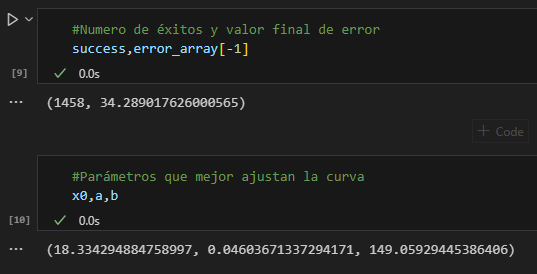

Imagen del segundo resultado

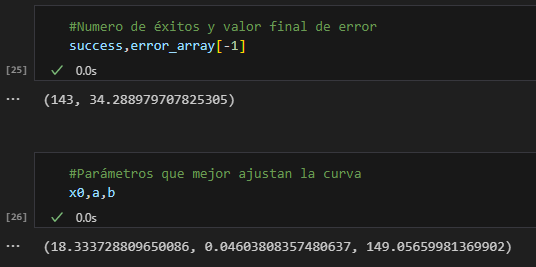

### Evolución del error

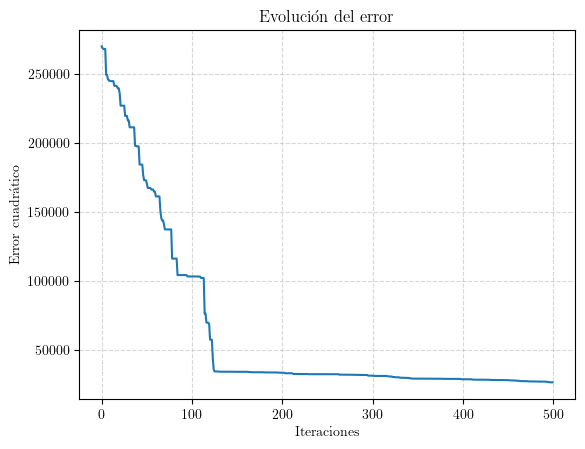

In [63]:
plt.plot(errors[0:500])
plt.xlabel("Iteraciones")
plt.ylabel("Error cuadrático")
plt.title("Evolución del error")
plt.grid(linestyle="--",alpha=0.5)
plt.savefig("P1E1.pdf")

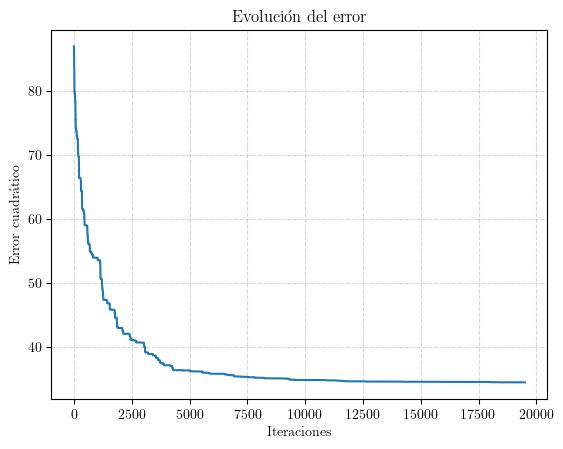

In [13]:
plt.plot(error_array[500:20000])
plt.xlabel("Iteraciones")
plt.ylabel("Error cuadrático")
plt.title("Evolución del error")
plt.grid(linestyle="--",alpha=0.5)
plt.savefig("P1E2.pdf")

### Ajuste final

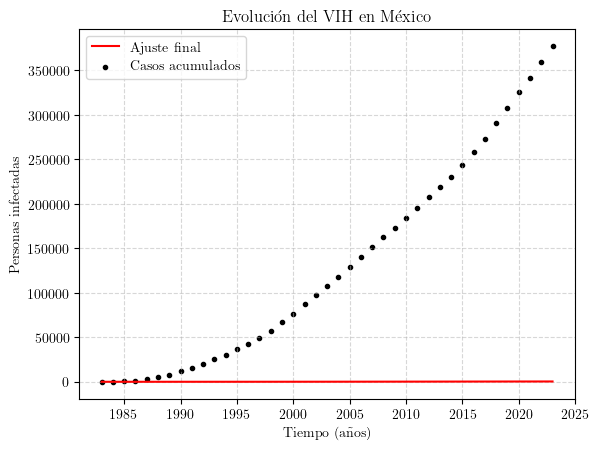

In [71]:
fig,ax=plt.subplots()
plt.plot(time,Logistic2(time,x0,a,b),color="red",label="Ajuste final")
plt.scatter(time,cumdata,color="black", marker='.',label="Casos acumulados")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Personas infectadas")
plt.title("Evolución del VIH en México")
plt.legend()
plt.savefig("P2I2.pdf")

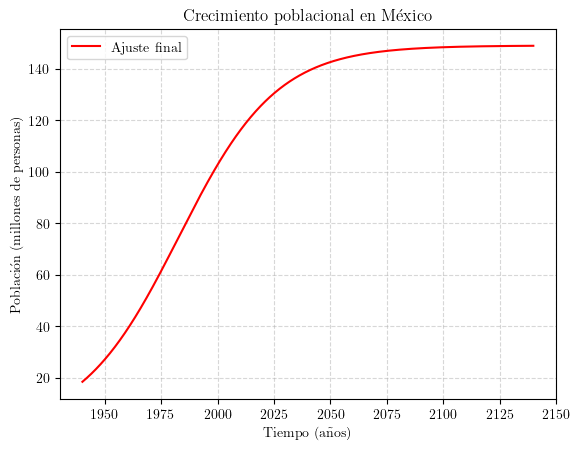

In [18]:
fig,ax=plt.subplots()
time1=np.linspace(1980,2100,1000)
plt.plot(time1,Logistic2(time1,x0,a,b),color="red",label="Ajuste final")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Población (millones de personas)")
plt.title("Crecimiento poblacional en México")
plt.legend()
plt.savefig("P1I3.pdf")

Para calcular el tiempo en el que  se demora en llegar al valor de saturación, aproximaremos b a 149 millones

In [31]:
#Establecemos el valor de la población en 2023 como el último valor del ajuste
lim=new_x.to_numpy()[-1]
i=time.size
#Ciclo hasta que la diferencia entre el valor calculado y el límite de saturación
#sea menos a una tolerancia
while np.abs(lim-b)>0.2:
    #Se calcula la población al año i
    lim=Logistic(i,x0,a,b)
    #para calcular la población el siguiente año
    i+=1

In [32]:
i+1940,lim

(2128, 148.86296055602526)